In [26]:
#--------------------------------------
# FUNCAO QUE MONTA O CIRCUITO DE DEUTSCH
# USANDO 1 REGISTRO CLASSICO NO MEDIDOR
#--------------------------------------
def DEUTSCH_CNOT_1():
    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
#-----------------
    Q  = QuantumRegister(  2, name = 'q')
    C  = ClassicalRegister(1, name = 'c')
    QC = QuantumCircuit(Q, C, name = "DEUTSCH_1")
#-----------------
    QC.x(Q[0])
    QC.barrier()
    QC.h(Q)
    QC.cx(Q[1], Q[0])
    QC.h(Q[1])
    QC.measure(Q[1],C[0])
    print(' DEUTSCH_1(): FUNCIONA')
    return QC
#--------------------------------------
# FUNCAO QUE MONTA O CIRCUITO DE DEUTSCH
# USANDO 2 REGISTROS CLASSICO NO MEDIDOR
#--------------------------------------
def DEUTSCH_CNOT_2():
    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit;
#-----------------
    Q  = QuantumRegister(  2, name = 'q')
    C  = ClassicalRegister(2, name = 'c')
    QC = QuantumCircuit(Q, C, name = "DEUTSCH_2")
#-----------------
    QC.x(Q[0])
    QC.barrier()
    QC.h(Q)
    QC.cx(Q[1], Q[0])
    QC.h(Q[1])
    QC.measure(Q,C)
    print(' DEUTSCH_2(): FUNCIONA')
    return QC

In [27]:
QC1 = DEUTSCH_CNOT_1()
QC2 = DEUTSCH_CNOT_2()

 DEUTSCH_1(): FUNCIONA
 DEUTSCH_2(): FUNCIONA


In [28]:
print(QC1); print(QC2);

        ┌───┐ ░ ┌───┐┌───┐        
q_0: |0>┤ X ├─░─┤ H ├┤ X ├────────
        └───┘ ░ ├───┤└─┬─┘┌───┐┌─┐
q_1: |0>──────░─┤ H ├──■──┤ H ├┤M├
              ░ └───┘     └───┘└╥┘
 c_0: 0 ════════════════════════╩═
                                  
        ┌───┐ ░ ┌───┐┌───┐┌─┐        
q_0: |0>┤ X ├─░─┤ H ├┤ X ├┤M├────────
        └───┘ ░ ├───┤└─┬─┘└╥┘┌───┐┌─┐
q_1: |0>──────░─┤ H ├──■───╫─┤ H ├┤M├
              ░ └───┘      ║ └───┘└╥┘
 c_0: 0 ═══════════════════╩═══════╬═
                                   ║ 
 c_1: 0 ═══════════════════════════╩═
                                     


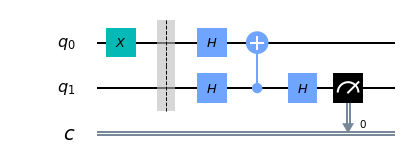

In [29]:
QC1.draw(output='mpl')

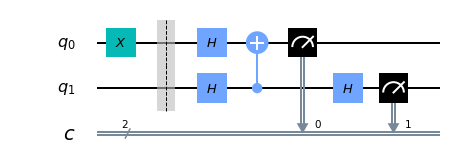

In [30]:
QC2.draw(output='mpl')

In [6]:
#------------------------------------------------------------------------
# FUNCAO PARA CRIAR O HISTOGRAMA:
#------------------------------------------------------------------------
def PLOT_HISTOGRAMS( DATA, LEGEND ):
    from qiskit.tools.visualization import plot_histogram
    HIST = plot_histogram( DATA, legend = LEGEND, bar_labels = True, figsize = (7, 5), color= ['red','green','gray']  )
    display(HIST)
    return None

In [7]:
#------------------------------------------------------------------------
# FUNCAO QUE EXECUTA O CIRCUITO NA MAQUINA LOCAL:
#------------------------------------------------------------------------
def SIMULADOR_LOCAL(QC, N_SHOTS, BACKEND_NAME):
    from qiskit  import Aer
    from qiskit  import execute
#--------------
    F_NAME = '\'SIMULADOR_LOCAL()\''
    BACKEND = Aer.get_backend(BACKEND_NAME)
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS)
    RESULT = EXP.result()
    print(' RESULTS:')
    print('   backend_name:', RESULT.backend_name, end =' | ')
    print('   status:',       RESULT.status, end =' | ')
    print('   success:',      RESULT.success)
    print('   get_counts():', RESULT.get_counts() ) 
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME)
    return RESULT.get_counts()

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'1': 8192}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'10': 4161, '11': 4031}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


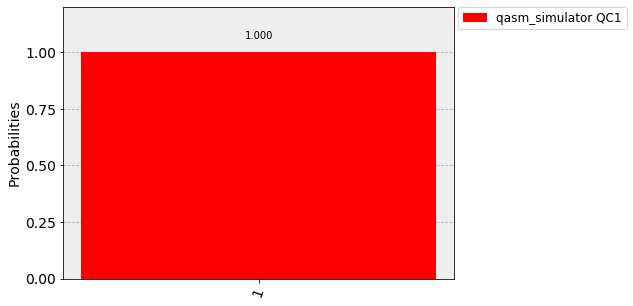

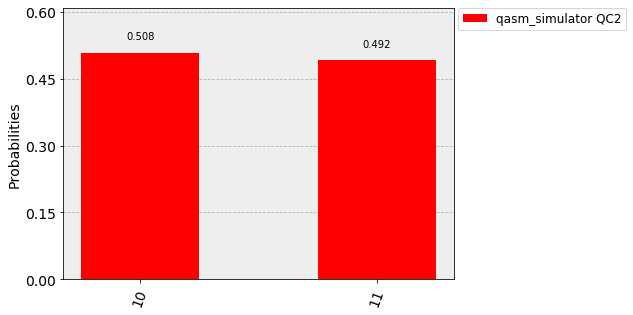

In [8]:
# EXECUTANDO/SIMULANDO O CIRCUITO

N_SHOTS = 2**(13)
BACKEND_NAME = "qasm_simulator"

DADOS_1 = SIMULADOR_LOCAL(QC1, N_SHOTS, BACKEND_NAME)
DADOS_2 = SIMULADOR_LOCAL(QC2, N_SHOTS, BACKEND_NAME)

PLOT_HISTOGRAMS( [DADOS_1],  [BACKEND_NAME+' QC1'] )
PLOT_HISTOGRAMS( [DADOS_2],  [BACKEND_NAME+' QC2'] )

In [9]:
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram

In [10]:
fig = plot_histogram( [DADOS_1], bar_labels = False, color='blue', figsize = (10, 6) )
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.25, 0.50, 0.75, 1.00], fontsize=20)
ax.set_xticklabels([ r'$\left\vert 1 \right\rangle$' ], fontsize=20)
fig.savefig('Hist_SC_one_deutsch.png')

In [20]:
fig = plot_histogram( [DADOS_2], bar_labels = False, color='blue', figsize = (10, 6) )
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.15, 0.30, 0.45, 0.60], fontsize=20)
ax.set_xticklabels([ r'$\left\vert10\right\rangle$', r'$\left\vert11\right\rangle$' ], fontsize=20)
fig.savefig('Hist_SC_two_deutsch.png')

In [13]:
#------------------------------------------------------------------------
# FUNCAO PARA SE REGISTRAR NA IBM:
#------------------------------------------------------------------------
def CHIP_REGISTER():
    from qiskit import IBMQ
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
    # Você pode obter o seu token em:
    # https://quantum-computing.ibm.com/
    QX_TOKEN = "cole seu token aqui"
    QX_URL = "https://quantumexperience.ng.bluemix.net/api"
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
    try :
        IBMQ.save_account(QX_TOKEN)
        print('Registado com sucesso!')
    except :
        print('Algo deu errado. \nVocê inseriu o token correto?')
    return None
#-----------------------------------------------------------------------
CHIP_REGISTER()

 CHIP_REGISTER() DIZ:
 REGISTER OK


In [14]:
# DANDO UMA OLHADA NOS BACKENDS:
def CHECK_REMOTE_BACKENDS():
    from qiskit import IBMQ
    from qiskit.tools.monitor import backend_overview

    print(' ARTIFICIAL:\n',   IBMQ.backends( local = False, simulator = True) )
    print('\n CHIP REAL :\n', IBMQ.backends( local = False, simulator = False) )

    print("\n BACKEND_OVERVIEW():\n")
    backend_overview()

    return None

CHECK_REMOTE_BACKENDS()

/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


 ARTIFICIAL:
 [<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>]

 CHIP REAL :
 [<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

 BACKEND_OVERVIEW():



/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


ibmq_santiago                ibmq_athens                  ibmq_armonk
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 20             Pending Jobs: 1              Pending Jobs: 10
Least busy:   False          Least busy:   True           Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      137.6          Avg. T1:      77.7           Avg. T1:      133.1
Avg. T2:      113.2          Avg. T2:      113.7          Avg. T2:      182.2



ibmq_valencia                ibmq_ourense                 ibmq_vigo
-------------                ------------                 ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 2              Pending Jobs: 1              Pending Jobs: 24
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Opera

In [15]:
#------------------------------------------------------------------------
# FUNCAO QUE EXECUTA O CIRCUITO NA MAQUINA REMOTA:
#------------------------------------------------------------------------
def SIMULADOR_REMOTO(QC, N_SHOTS, BACKEND_NAME):
    from qiskit               import IBMQ
    from qiskit               import execute
    from qiskit.tools.monitor import job_monitor
#--------------
    F_NAME = '\'SIMULADOR_REMOTO()\''
    BACKEND = IBMQ.get_backend(BACKEND_NAME)
# METODO NOVO:
#   PROVIDER = IBMQ.load_account()
#   PROVIDER = IBMQ.enable_account('MY_API_TOKEN')
#   BACKEND  = PROVIDER.get_backend(BACKEND_NAME)
#--------------
    STATUS  = BACKEND.status()
    if( STATUS.operational == False ):
        print(' FUNCAO %s DIZ:'% F_NAME )
        print(' ESTE BACKEND NAO ESTA OPERACIONAL NO MOMENTO, VEJA:')
        print("    STATUS.operational =",  STATUS)
        print(' ENCERRANDO'); return None
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS)
    job_monitor(EXP, interval = 5)

    RESULT = EXP.result()
    print(' RESULTS:')
    print('   backend_name:', RESULT.backend_name, end =' |')
    print('   status:',       RESULT.status, end =' |')
    print('   success:',      RESULT.success)
    print('   get_counts():', RESULT.get_counts() ) # print(' get_data() = ',   result.get_data(qc) )
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME)
    return RESULT.get_counts()

/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmqx2 |   status: Successful completion |   success: True
   get_counts(): {'1': 7622, '0': 570}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_ourense |   status: Successful completion |   success: True
   get_counts(): {'1': 7774, '0': 418}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_16_melbourne |   status: Successful completion |   success: True
   get_counts(): {'1': 7566, '0': 626}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


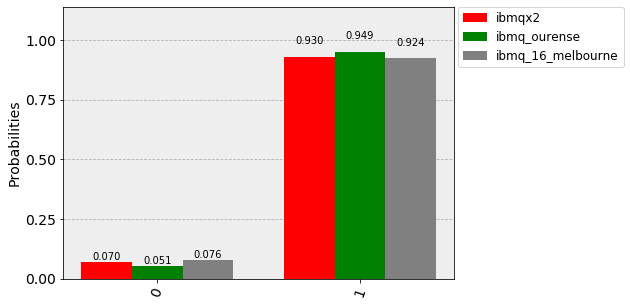

In [16]:
# EXECUTANDO O CIRCUITO
N_SHOTS = 2**(13);

#BACKEND_NAME = "ibmq_qasm_simulator"; DADOS_qasm   = SIMULADOR_REMOTO(QC1, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmqx2";              DADOS_ibmqx2 = SIMULADOR_REMOTO(QC1, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_ourense";              DADOS_ibmq_ourense = SIMULADOR_REMOTO(QC1, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_16_melbourne";              DADOS_ibmq_16_melbourne = SIMULADOR_REMOTO(QC1, N_SHOTS, BACKEND_NAME);

# BACKEND_NAME = "ibmqx4";
# BACKEND_NAME = "ibmq_16_melbourne";

PLOT_HISTOGRAMS( [ DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne],  [ 'ibmqx2', 'ibmq_ourense', 'ibmq_16_melbourne'] );

In [17]:
fig = plot_histogram( [DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne], bar_labels = False, color= ['red','green','gray'], figsize = (10, 6) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.25, 0.50, 0.75, 1.00], fontsize=20)
ax.set_xticklabels([ r'$\left\vert 0 \right\rangle$' , r'$\left\vert 1 \right\rangle$' ], fontsize=20)
fig.savefig('Hist_SQ_one_deutsch.png')

/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmqx2 |   status: Successful completion |   success: True
   get_counts(): {'01': 1104, '10': 2633, '11': 4092, '00': 363}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_ourense |   status: Successful completion |   success: True
   get_counts(): {'01': 176, '10': 4292, '11': 3491, '00': 233}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/warley/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_16_melbourne |   status: Successful completion |   success: True
   get_counts(): {'01': 300, '10': 4038, '11': 3493, '00': 361}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


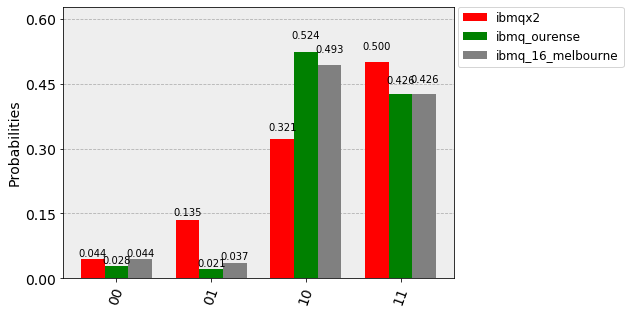

In [18]:
# EXECUTANDO O CIRCUITO
N_SHOTS = 2**(13);

#BACKEND_NAME = "ibmq_qasm_simulator"; DADOS_qasm   = SIMULADOR_REMOTO(QC1, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmqx2";              DADOS_ibmqx2 = SIMULADOR_REMOTO(QC2, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_ourense";              DADOS_ibmq_ourense = SIMULADOR_REMOTO(QC2, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_16_melbourne";              DADOS_ibmq_16_melbourne = SIMULADOR_REMOTO(QC2, N_SHOTS, BACKEND_NAME);

# BACKEND_NAME = "ibmqx4";
# BACKEND_NAME = "ibmq_16_melbourne";

PLOT_HISTOGRAMS( [ DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne],  [ 'ibmqx2', 'ibmq_ourense', 'ibmq_16_melbourne'] );

In [19]:
fig = plot_histogram( [DADOS_ibmqx2, DADOS_ibmq_ourense, DADOS_ibmq_16_melbourne], bar_labels = False, color= ['red','green','gray'], figsize = (10, 6) );
ax = fig.axes[0]
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.5)
ax.patch.set_edgecolor('black')
ax.set_ylabel('Probabilidades', fontsize=26)
ax.set_yticklabels([0.00, 0.15, 0.30, 0.45], fontsize=20)
ax.set_xticklabels([r'$\left\vert00\right\rangle$', r'$\left\vert01\right\rangle$', r'$\left\vert10\right\rangle$', r'$\left\vert11\right\rangle$' ], fontsize=20)
fig.savefig('Hist_SQ_two_deutsch.png')